# Applications of Machine Learning Algorithms (Working with three models)

### Load libraries

In [1]:
%run ../services/imports.py
%run ../services/function.py
%run ../services/classifier_evaluation.py
%run ../services/visualization.py

importing Jupyter notebook from C:\Users\jeanc\projetos pessoais\project_dataScience_POSCOMP\notebooks\..\services\especialidades.ipynb


In [2]:
visualizacao = Visualizacao()

## Load the database

In [3]:
dataset = pd.read_csv('../dados/df_poscomp.csv')

In [4]:
dataset['linhas_pesquisas'].value_counts()

linhas_pesquisas
inteligência artificial    3197
sistemas de computação     2254
engenharia de software     2016
Outros                     1280
redes de computadores      1146
Name: count, dtype: int64

In [5]:
dataset = dataset[(dataset['linhas_pesquisas'] != 'Outros')]

In [6]:
X_dataset = dataset.loc[:,['IDADE','SEXO','REGIAO','ESTADO','matematica', 'fund_computacao','tec_computacao','total','area_concentration']]

In [7]:
X_dataset['area_concentration'] = dataset.area_concentration
X_dataset['area_concentration'] = X_dataset['area_concentration'].astype('category')

In [8]:
def encode_categorical_columns(df, columns):
    le = LabelEncoder()
    for col in columns:
        df[col] = le.fit_transform(df[col])
    return df

categorical_columns = ["area_concentration",'SEXO','REGIAO','ESTADO']
X_dataset = encode_categorical_columns(X_dataset, categorical_columns)


In [9]:
X = X_dataset.drop(['area_concentration'], axis=1)
y = X_dataset['area_concentration']

## Working with the first model

### Split the base

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)

In [10]:
print("Shape of x_train : ",x_train.shape)
print("Shape of x_test  : ",x_test.shape)
print("Shape of y_train : ",y_train.shape)
print("Shape of y_test  : ",y_test.shape)

Shape of x_train :  (6029, 8)
Shape of x_test  :  (2584, 8)
Shape of y_train :  (6029,)
Shape of y_test  :  (2584,)


#### Turing hyperparameter

##### Árvore de Decisão

In [ ]:
parametros = {'criterion': ["entropy", "log_loss"],
    'splitter': ["best"],
    'max_depth': [7,8,9,10,12],  # Ou qualquer outro intervalo apropriado
    'min_samples_split': [2, 5, 10,15],
    'min_samples_leaf': [3,5,9],
    # 'min_weight_fraction_leaf': [0.0, 0.1, 0.2],
    'max_features': [1,2,3,4],
    'max_leaf_nodes': [None, 5, 10, 20],
    # 'min_impurity_decrease': [0.0, 0.1, 0.2],
    # 'ccp_alpha': [0.0, 0.1, 0.2],
}

In [ ]:
tree_clf = ClassifierWrapper(DecisionTreeClassifier(random_state=42), parametros)
tree_clf.grid_search(x_train, y_train, cv=3)
tree_clf.train_and_print_scores(x_train, y_train, x_test, y_test)

##### Rede Neural

In [ ]:
parametros = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100), (500,250,125), (200,100,50)],  # Experimente diferentes configurações de camadas e neurônios
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'batch_size': [100,200,300],
    # 'learning_rate': ['invscaling'],
    # 'learning_rate_init': [0.001, 0.01, 0.1],
    # 'power_t': [0.5, 0.9],
    # 'max_iter': [100,200],
    # 'shuffle': [True, False],
    # 'random_state': [None, 42],
    # 'tol': [1e-4, 1e-3, 1e-2],
    # 'verbose': [True, False],
    # 'warm_start': [True, False],
    # 'momentum': [0.5, 0.9],
    # 'nesterovs_momentum': [True, False],
    # 'early_stopping': [True, False],
    # 'validation_fraction': [0.1, 0.2],
    # 'beta_1': [0.9, 0.99],
    # 'beta_2': [0.999, 0.9999],
    # 'epsilon': [1e-8, 1e-7],
    # 'n_iter_no_change': [5, 10, 15],
    # 'max_fun': [10000, 15000, 20000]
}

In [ ]:
neural_clf = ClassifierWrapper(MLPClassifier(random_state=42), parametros)
neural_clf.grid_search(x_train, y_train, cv=3)
neural_clf.train_and_print_scores(x_train, y_train, x_test, y_test)

##### Random Forest

In [ ]:
parametros = {
    'n_estimators': [1000],  # Você pode ajustar o número de árvores conforme necessário
    'criterion': ['entropy'],
    'max_depth': [10,12],
    # 'min_samples_split': [2, 5],
    'min_samples_leaf': [2],
    # 'min_weight_fraction_leaf': [0.0, 0.1, 0.2],
    'max_features': [6],
    # 'max_leaf_nodes': [None, 10, 20, 30],
    # 'min_impurity_decrease': [0.0, 0.1, 0.2],
    'bootstrap': [False],
    # 'oob_score': [True, False],
    'n_jobs': [-1],  # Use -1 para usar todos os processadores disponíveis
    # 'random_state': [None, 42],  # Use um valor fixo para repetibilidade
    # 'verbose': [0, 1, 2],
    'warm_start': [True, False],
    # 'class_weight': [None, 'balanced', 'balanced_subsample'],
    # 'ccp_alpha': [0.0, 0.1, 0.2],
    # 'max_samples': [None, 0.7, 0.8, 0.9],
}

In [ ]:
forest_clf = ClassifierWrapper(RandomForestClassifier(random_state=42), parametros)
forest_clf.grid_search(x_train, y_train, cv=3)
forest_clf.train_and_print_scores(x_train, y_train, x_test, y_test)

##### SVM

In [ ]:
parametros = {
    'C': [20,30,40,50],
    'kernel': ['rbf'],
    'degree': [1,2,3],
    'gamma': ['scale', 'auto', 0.1, 1.0],
    # 'coef0': [0.0, 0.1, 1.0],
    # 'shrinking': [True, False],
    # 'probability': [True],
    # 'tol': [1e-4],
    # 'cache_size': np.arange(1,11,2),
    'class_weight': ['balanced'],
    # 'verbose': [True],
    # 'max_iter': [100, 1000, -1],  # -1 indica nenhum limite
    # 'decision_function_shape': ['ovr', 'ovo'],
    # 'break_ties': [True],
}

In [ ]:
svm_clf = ClassifierWrapper(SVC(random_state=42), parametros)
svm_clf.grid_search(x_train, y_train, cv=2)
svm_clf.train_and_print_scores(x_train, y_train, x_test, y_test)

### Cross Validation

In [89]:
x_poscomp = np.concatenate((x_train, x_test), axis = 0)
y_poscomp = np.concatenate((y_train, y_test), axis = 0)

In [90]:
# Uso para Decision Tree
params_arvore = {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 6, 'random_state': 42}
resultados_arvore = ClassifierWrapper.avaliar_classificador(DecisionTreeClassifier, params_arvore, x_poscomp, y_poscomp)

# Uso para Random Forest
params_random_forest = {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 
                        6, 'min_samples_leaf': 2, 'n_estimators': 1000, 'n_jobs': -1, 'warm_start': True}
resultados_random_forest = ClassifierWrapper.avaliar_classificador(RandomForestClassifier, params_random_forest, x_poscomp, y_poscomp)

# Uso para SVM
params_svm = {'C': 5000, 'break_ties': True, 'degree': 1, 'probability': True, 'random_state': 42,
              'tol': 0.0001, 'verbose': True}
resultados_svm = ClassifierWrapper.avaliar_classificador(SVC, params_svm, x_poscomp, y_poscomp)

# Uso para MLP (Rede Neural)
params_rede_neural = {'activation': 'tanh', 'hidden_layer_sizes': (100, 100), 'random_state': 42}
resultados_rede_neural = ClassifierWrapper.avaliar_classificador(MLPClassifier, params_rede_neural, x_poscomp, y_poscomp)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

In [92]:
resultados = pd.DataFrame({'decisionTree_treino': resultados_arvore[0]['train_score'], 
                                'decisionTree_teste': resultados_arvore[0]['test_score'],
                                'randomForest_treino': resultados_random_forest[0]['train_score'],
                                'randomForest_teste': resultados_random_forest[0]['test_score'],
                                'svm_treino': resultados_svm[0]['train_score'],
                                'svm_teste': resultados_svm[0]['test_score'],
                                'redeNeural_treino': resultados_rede_neural[0]['train_score'],
                                'redeNeural_teste': resultados_rede_neural[0]['test_score'],
                               })

In [93]:
resultados.describe()

,decisionTree_treino,decisionTree_teste,randomForest_treino,randomForest_teste,svm_treino,svm_teste,redeNeural_treino,redeNeural_teste
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.658965,0.655401,0.762478,0.655166,0.648567,0.634855,0.681244,0.638565
std,0.004521,0.011901,0.006622,0.016794,0.001201,0.006168,0.005743,0.017197
min,0.654754,0.639954,0.752451,0.637631,0.646110,0.623693,0.673633,0.612079
25%,0.655605,0.648374,0.760257,0.644599,0.647962,0.632510,0.677332,0.629501
50%,0.655895,0.650029,0.762369,0.651568,0.648478,0.637050,0.679997,0.641323
75%,0.663753,0.664925,0.764996,0.658927,0.649498,0.638607,0.683695,0.646938
max,0.665506,0.677494,0.775284,0.693735,0.650026,0.642276,0.693498,0.669374


In [94]:
resultados.var()

decisionTree_treino    0.000020
decisionTree_teste     0.000142
randomForest_treino    0.000044
randomForest_teste     0.000282
svm_treino             0.000001
svm_teste              0.000038
redeNeural_treino      0.000033
redeNeural_teste       0.000296
dtype: float64

In [95]:
(resultados.std() / resultados.mean()) * 100

decisionTree_treino    0.686074
decisionTree_teste     1.815781
randomForest_treino    0.868425
randomForest_teste     2.563294
svm_treino             0.185209
svm_teste              0.971619
redeNeural_treino      0.843026
redeNeural_teste       2.693143
dtype: float64

In [98]:
medias = resultados.mean()
for nome_coluna, media in medias.items():
    print(f'Média da {nome_coluna}: {media * 100:.2f}%')

Média da decisionTree_treino: 65.90%
Média da decisionTree_teste: 65.54%
Média da randomForest_treino: 76.25%
Média da randomForest_teste: 65.52%
Média da svm_treino: 64.86%
Média da svm_teste: 63.49%
Média da redeNeural_treino: 68.12%
Média da redeNeural_teste: 63.86%


In [169]:
resultados_teste = resultados.loc[:,['decisionTree_teste','randomForest_teste','svm_teste','redeNeural_teste']]

In [170]:
resultados_teste.columns = ['Árvore de Decisão', 'Random Forest', 'SVM', 'Rede Neural']

In [171]:
resultados_teste

,Árvore de Decisão,Random Forest,SVM,Rede Neural
0,0.650812,0.656613,0.634571,0.648492
1,0.677494,0.693735,0.625290,0.641531
2,0.665893,0.670534,0.638051,0.669374
3,0.639954,0.652729,0.637631,0.639954
4,0.649245,0.659698,0.638792,0.650407
5,0.649245,0.637631,0.623693,0.612079
6,0.644599,0.650407,0.636469,0.614402
7,0.666667,0.648084,0.639954,0.641115
8,0.662021,0.643438,0.642276,0.642276
9,0.648084,0.638792,0.631823,0.626016


In [172]:
resultados_treino = resultados.loc[:,['decisionTree_treino','randomForest_treino','svm_treino','redeNeural_treino']]

In [173]:
resultados_treino.columns = ['Árvore de Decisão', 'Random Forest', 'SVM', 'Rede Neural']

In [174]:
resultados_treino.mean()

Árvore de Decisão    0.658965
Random Forest        0.762478
SVM                  0.648567
Rede Neural          0.681244
dtype: float64

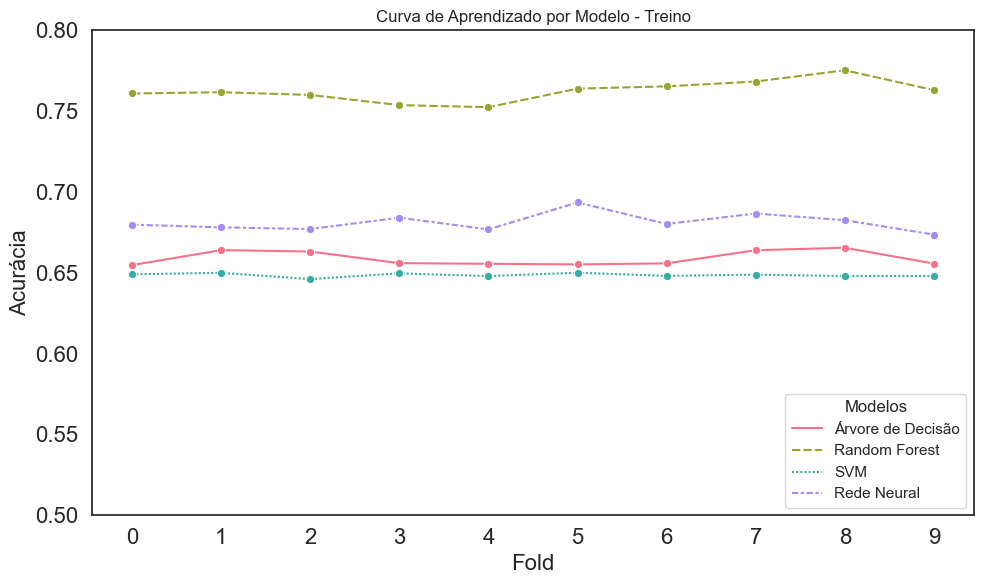

In [198]:
visualizacao.line_plot(resultados_treino, title_plot='Curva de Aprendizado por Modelo - Treino', xlabel='Fold',
                       ylabel='Acurácia', legend_title='Modelos', save_path='../imagens/curva_aprendizado_ML0_treino.png')

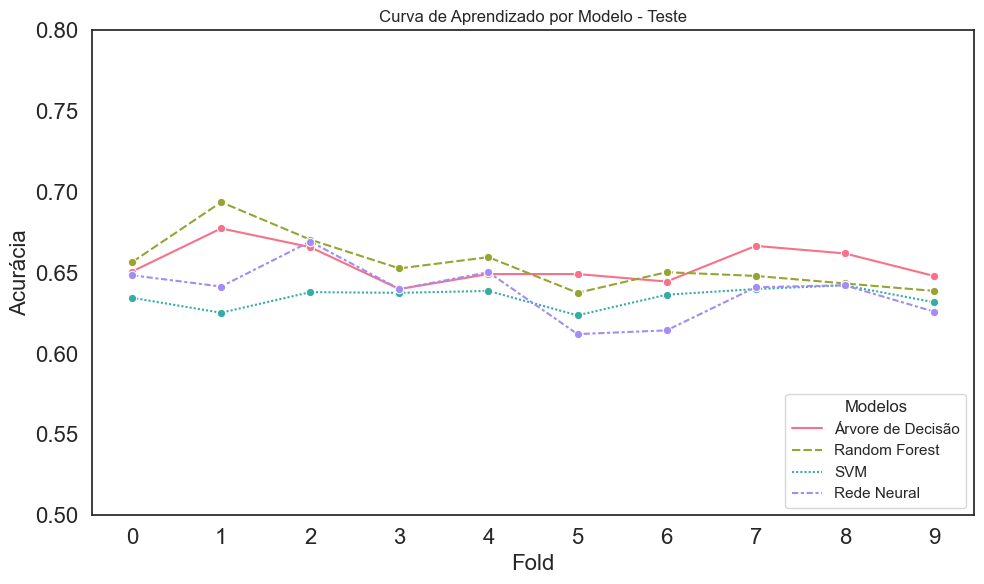

In [199]:
visualizacao.line_plot(resultados_teste, title_plot='Curva de Aprendizado por Modelo - Teste', xlabel='Fold',
                       ylabel='Acurácia', legend_title='Modelos', save_path='../imagens/curva_aprendizado_ML0_teste.png')

#### Teste de normalidade

In [ ]:
alpha = 0.05

In [ ]:
from scipy.stats import shapiro

In [ ]:
shapiro(resultados_arvore), shapiro(resultados_random_forest), shapiro(resultados_svm), shapiro(resultados_rede_neural)

#### Teste de hipótese com ANOVA e Tukey

In [ ]:
from scipy.stats import f_oneway

In [ ]:
_, p = f_oneway(resultados_arvore, resultados_random_forest, resultados_svm, resultados_rede_neural)
p

In [ ]:
alpha = 0.05
if p <= alpha:
  print('Hipótese nula rejeitada. Dados são diferentes')
else:
  print('Hipótese alternativa rejeitada. Resultados são iguais')

In [ ]:
resultados_algoritmos = {'accuracy': np.concatenate([resultados_arvore, resultados_random_forest, resultados_svm, resultados_rede_neural]),
                         'algoritmo': ['arvore','arvore','arvore','arvore','arvore'
                          'random_forest','random_forest','random_forest','random_forest','random_forest'
                          'svm','svm','svm','svm','svm'
                          'rede_neural','rede_neural','rede_neural','rede_neural','rede_neural']}

In [ ]:
resultados_algoritmos = {'accuracy': np.concatenate([resultados_arvore, resultados_random_forest, resultados_svm, resultados_rede_neural]),
                         'algoritmo': ['arvore']*len(resultados_arvore) + ['random_forest']*len(resultados_random_forest) + ['svm']*len(resultados_svm) + ['rede_neural']*len(resultados_rede_neural)}


In [ ]:
resultados_df = pd.DataFrame(resultados_algoritmos)
resultados_df

In [ ]:
from statsmodels.stats.multicomp import MultiComparison

In [ ]:
compara_algoritmos = MultiComparison(resultados_df['accuracy'], resultados_df['algoritmo'])

In [ ]:
teste_estatistico = compara_algoritmos.tukeyhsd()
print(teste_estatistico)

In [ ]:
resultados.mean()

In [ ]:
teste_estatistico.plot_simultaneous();

#### Salvar o classificador treinado

In [100]:
classificador_randomForest = RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=10,
                       n_estimators=1000, n_jobs=-1, random_state=42, max_features=6, min_samples_leaf=2,
                       warm_start=True)
classificador_randomForest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=10,
                       max_features=6, min_samples_leaf=2, n_estimators=1000,
                       n_jobs=-1, random_state=42, warm_start=True)

In [109]:
predict = classificador_randomForest.predict(x_test)

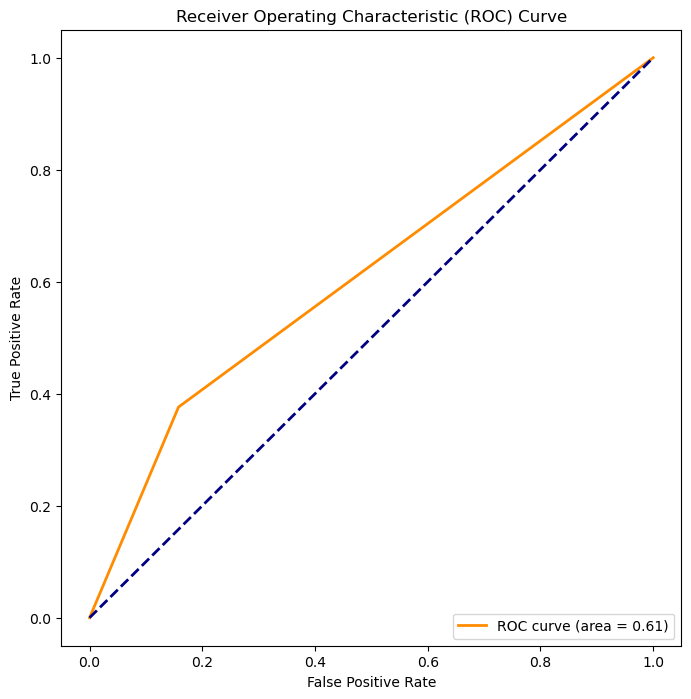

In [110]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, predict)

# Calcule a área sob a curva ROC (AUC)
roc_auc = auc(fpr, tpr)

# Plote a curva ROC
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
with open('dados/classificadores/randomForest_finalizado2.sav', 'wb') as file:
    pickle.dump(classificador_randomForest, file, protocol=pickle.HIGHEST_PROTOCOL)

#### Carregar um classificar treinado

In [ ]:
randomForest = pickle.load(open('randomForest_finalizado.sav', 'rb'))

## Applications of the two models

### Candidates classified for the computing area

<h4> <i>Load data </i></h4>

In [200]:
df_computation = dataset[dataset['area_concentration'] == 'computacao']

In [201]:
df_computation = df_computation.loc[:,['IDADE','SEXO','REGIAO','ESTADO','matematica', 'fund_computacao','tec_computacao','total','linhas_pesquisas']]

In [202]:
categorical_columns_comp = ["linhas_pesquisas",'SEXO','REGIAO','ESTADO']
df_computation = encode_categorical_columns(df_computation, categorical_columns_comp)

In [203]:
x_computation = df_computation.drop(['linhas_pesquisas'], axis=1)
y_computation = df_computation['linhas_pesquisas']

<h5><i>Split of data</i></h5>

In [204]:
x_train_comp, x_test_comp, y_train_comp, y_test_comp = train_test_split(x_computation, y_computation, 
                                                                        test_size=0.3, stratify=y_computation, random_state=42)

In [205]:
print("Shape of x_train : ",x_train_comp.shape)
print("Shape of x_test  : ",x_test_comp.shape)
print("Shape of y_train : ",y_train_comp.shape)
print("Shape of y_test  : ",y_test_comp.shape)

Shape of x_train :  (3815, 8)
Shape of x_test  :  (1636, 8)
Shape of y_train :  (3815,)
Shape of y_test  :  (1636,)


##### Busca por hiperparamentros

###### Decision Tree

In [ ]:
parametros = {'criterion': ["entropy", 'gini'],
    'splitter': ["best"],
    'max_depth': [9],  # Ou qualquer outro intervalo apropriado
    # 'min_samples_split': [2,5],
    'min_samples_leaf': [12],
    # 'min_weight_fraction_leaf': [0.5],
    'max_features': [9],
    'max_leaf_nodes': [30],
    # 'min_impurity_decrease': [0.0, 0.1, 0.2],
    # 'ccp_alpha': [0.0, 0.1, 0.2],
}

In [ ]:
tree_clf = ClassifierWrapper(DecisionTreeClassifier(random_state=42), parametros)
tree_clf.grid_search(x_train_comp, y_train_comp, cv=10)
tree_clf.train_and_print_scores(x_train_comp, y_train_comp, x_test_comp, y_test_comp)

###### Random Forest

In [ ]:
parametros = {
    'n_estimators': [500],
    'criterion': ["entropy"],
    'max_depth': [6],
    'min_samples_split': [2,4,6],
    'min_samples_leaf': [9],
    # 'min_weight_fraction_leaf': [0.0, 0.1, 0.2],
    'max_features': [8],
    'max_leaf_nodes': [20],
    # 'min_impurity_decrease': [0.0, 0.1, 0.2],
    'bootstrap': [True],
    'oob_score': [True],
    'n_jobs': [-1],  # Use -1 para usar todos os processadores disponíveis
    # 'verbose': [0, 1, 2],
    'warm_start': [True],
    # 'class_weight': ['balanced', 'balanced_subsample'],
    # 'ccp_alpha': [0.0, 0.1, 0.2],
    # 'max_samples': [1,2,3,4,5],
}

In [ ]:
forest_clf = ClassifierWrapper(RandomForestClassifier(random_state=42), parametros)
forest_clf.grid_search(x_train_comp, y_train_comp, cv=10)
forest_clf.train_and_print_scores(x_train_comp, y_train_comp, x_test_comp, y_test_comp)

###### SVM

In [ ]:
parametros = {
    'C': [3,4,5],
    'degree': [1,2,3],
    'gamma': [0.1,0.2,0.5],
    'coef0': [0.1],
    'shrinking': [True,False],
    # 'probability': [True, False],
    # 'tol': [1e-4],
    # 'cache_size': np.arange(1,11,2),
    'class_weight': ['balanced'],
    # 'verbose': [True],
    # 'max_iter': [100, 1000, -1],  # -1 indica nenhum limite
    # 'decision_function_shape': ['ovr'],
    # 'break_ties': [True],
} 

In [ ]:
svm_clf = ClassifierWrapper(SVC(random_state=42, kernel='rbf'), parametros)
svm_clf.grid_search(x_train_comp, y_train_comp, cv=3)
svm_clf.train_and_print_scores(x_train_comp, y_train_comp, x_test_comp, y_test_comp)

In [ ]:
svm_clf = ClassifierWrapper(SVC(random_state=42, kernel='linear'), parametros)
svm_clf.grid_search(x_train_comp, y_train_comp, cv=2)
svm_clf.train_and_print_scores(x_train_comp, y_train_comp, x_test_comp, y_test_comp)

In [ ]:
svm_clf = ClassifierWrapper(SVC(random_state=42, kernel='sigmoid'), parametros)
svm_clf.grid_search(x_train_comp, y_train_comp, cv=2)
svm_clf.train_and_print_scores(x_train_comp, y_train_comp, x_test_comp, y_test_comp)

In [ ]:
svm_clf = ClassifierWrapper(SVC(random_state=42, kernel='poly'), parametros)
svm_clf.grid_search(x_train_comp, y_train_comp, cv=2)
svm_clf.train_and_print_scores(x_train_comp, y_train_comp, x_test_comp, y_test_comp)

###### Rede Neural

In [ ]:
parametros = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100), (200,100,50)],
    # 'activation': [, , ],
    'solver': ['adam'],
    'alpha': [0.1],
    'batch_size': ['auto', 100, 200],
    # 'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'learning_rate_init': [0.01],
    # 'power_t': [0.5, 0.9],
    # 'max_iter': [200, 300, 400],
    # 'shuffle': [True, False],
    # 'random_state': [None, 42],
    # 'tol': [1e-4, 1e-3, 1e-2],
    # 'verbose': [True, False],
    # 'warm_start': [True, False],
    # 'momentum': [0.5, 0.9],
    # 'nesterovs_momentum': [True, False],
    'early_stopping': [True, False],
    # 'validation_fraction': [0.1, 0.2],
    'beta_1': [0.99],
    'beta_2': [0.999],
    'epsilon': [1e-8],
    'n_iter_no_change': [20],
    # 'max_fun': [10000, 15000, 20000]
}


In [ ]:
neural_clf = ClassifierWrapper(MLPClassifier(random_state=42, activation='identity'), parametros)
neural_clf.grid_search(x_train_comp, y_train_comp, cv=2)
neural_clf.train_and_print_scores(x_train_comp, y_train_comp, x_test_comp, y_test_comp)

In [ ]:
neural_clf = ClassifierWrapper(MLPClassifier(random_state=42, activation='logistic'), parametros)
neural_clf.grid_search(x_train_comp, y_train_comp, cv=2)
neural_clf.train_and_print_scores(x_train_comp, y_train_comp, x_test_comp, y_test_comp)

In [ ]:
neural_clf = ClassifierWrapper(MLPClassifier(random_state=42, activation='tanh'), parametros)
neural_clf.grid_search(x_train_comp, y_train_comp, cv=2)
neural_clf.train_and_print_scores(x_train_comp, y_train_comp, x_test_comp, y_test_comp)

In [ ]:
neural_clf = ClassifierWrapper(MLPClassifier(random_state=42, activation='relu'), parametros)
neural_clf.grid_search(x_train_comp, y_train_comp, cv=2)
neural_clf.train_and_print_scores(x_train_comp, y_train_comp, x_test_comp, y_test_comp)

##### Validação Cruzada

In [18]:
x_poscomp_comp = np.concatenate((x_train_comp, x_test_comp), axis = 0)
y_poscomp_comp = np.concatenate((y_train_comp, y_test_comp), axis = 0)

In [19]:
# Uso para Decision Tree
params_arvore_comp = {'criterion': 'gini', 'max_depth': 9, 'max_features': 9, 'max_leaf_nodes': 30, 
                      'min_samples_leaf': 12, 'splitter': 'best','random_state':42}
resultados_arvore_comp = ClassifierWrapper.avaliar_classificador(DecisionTreeClassifier, params_arvore_comp, x_poscomp_comp, y_poscomp_comp)

# Uso para Random Forest
params_random_forest_comp = {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 6, 'max_features': 8, 'max_leaf_nodes': 20, 
                             'min_samples_leaf': 9, 'min_samples_split': 2, 'n_estimators': 500, 'n_jobs': -1, 'oob_score': True, 
                             'warm_start': True,'random_state':42}
resultados_random_forest_comp = ClassifierWrapper.avaliar_classificador(RandomForestClassifier, params_random_forest_comp, x_poscomp_comp, y_poscomp_comp)

# Uso para SVM
params_svm_comp = {'C': 8, 'break_ties': True, 'coef0': 0.1, 'kernel':'poly',
                   'decision_function_shape': 'ovr', 'degree': 1, 'gamma': 'auto', 'tol': 0.0001,'random_state':42}
resultados_svm_comp = ClassifierWrapper.avaliar_classificador(SVC, params_svm_comp, x_poscomp_comp, y_poscomp_comp)

# Uso para MLP (Rede Neural)
params_rede_neural_comp = {'alpha': 0.1, 'batch_size': 'auto', 'beta_1': 0.99, 'beta_2': 0.999, 'early_stopping': False, 
                           'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100), 'learning_rate_init': 0.01, 'n_iter_no_change': 20, 
                           'solver': 'adam','random_state':42}
resultados_rede_neural_comp = ClassifierWrapper.avaliar_classificador(MLPClassifier, params_rede_neural_comp, x_poscomp_comp, y_poscomp_comp)

In [20]:
resultados_comp = pd.DataFrame({'decisionTree_treino': resultados_arvore_comp[0]['train_score'], 
                                'decisionTree_teste': resultados_arvore_comp[0]['test_score'],
                                'randomForest_treino': resultados_random_forest_comp[0]['train_score'],
                                'randomForest_teste': resultados_random_forest_comp[0]['test_score'],
                                'svm_treino': resultados_svm_comp[0]['train_score'],
                                'svm_teste': resultados_svm_comp[0]['test_score'],
                                'redeNeural_treino': resultados_rede_neural_comp[0]['train_score'],
                                'redeNeural_teste': resultados_rede_neural_comp[0]['test_score'],
                               })

In [22]:
resultados_comp.describe()

,decisionTree_treino,decisionTree_teste,randomForest_treino,randomForest_teste,svm_treino,svm_teste,redeNeural_treino,redeNeural_teste
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.720194,0.704093,0.720948,0.707578,0.666606,0.665203,0.702664,0.695103
std,0.002867,0.018047,0.002464,0.017688,0.002346,0.015718,0.012270,0.023761
min,0.716062,0.684404,0.716266,0.686239,0.662454,0.636697,0.668773,0.649541
25%,0.718202,0.693578,0.720597,0.698302,0.666327,0.657798,0.703832,0.689419
50%,0.720546,0.695693,0.721667,0.703670,0.666735,0.667890,0.706554,0.694495
75%,0.722279,0.711468,0.722330,0.708716,0.667941,0.675229,0.708367,0.705046
max,0.724363,0.743119,0.723547,0.746789,0.670200,0.688073,0.710355,0.737615


In [72]:
medias = resultados_comp.mean()
for nome_coluna, media in medias.items():
    print(f'Média da {nome_coluna}: {media * 100:.2f}%')

Média da decisionTree_treino: 72.02%
Média da decisionTree_teste: 70.41%
Média da randomForest_treino: 72.09%
Média da randomForest_teste: 70.76%
Média da svm_treino: 66.66%
Média da svm_teste: 66.52%
Média da redeNeural_treino: 70.27%
Média da redeNeural_teste: 69.51%


In [128]:
resultados_comp_teste = resultados_comp.loc[:,['decisionTree_teste','randomForest_teste','svm_teste','redeNeural_teste']]

In [129]:
resultados_comp_teste.mean()

decisionTree_teste    0.704093
randomForest_teste    0.707578
svm_teste             0.665203
redeNeural_teste      0.695103
dtype: float64

In [130]:
resultados_comp_teste.columns = ['Árvore de Decisão', 'Random Forest', 'SVM', 'Rede Neural']

In [131]:
resultados_comp_teste

,Árvore de Decisão,Random Forest,SVM,Rede Neural
0,0.694139,0.701465,0.644689,0.688645
1,0.693578,0.693578,0.666055,0.693578
2,0.689908,0.704587,0.667890,0.695413
3,0.743119,0.746789,0.688073,0.717431
4,0.722936,0.728440,0.678899,0.737615
5,0.693578,0.702752,0.677064,0.708257
6,0.711927,0.686239,0.667890,0.649541
7,0.710092,0.710092,0.655046,0.691743
8,0.684404,0.704587,0.669725,0.695413
9,0.697248,0.697248,0.636697,0.673394


In [132]:
resultados_comp_treino = resultados_comp.loc[:,['decisionTree_treino','randomForest_treino','svm_treino','redeNeural_treino']]

In [133]:
resultados_comp_treino.columns = ['Árvore de Decisão', 'Random Forest', 'SVM', 'Rede Neural']

In [134]:
resultados_comp_treino.mean()

Árvore de Decisão    0.720194
Random Forest        0.720948
SVM                  0.666606
Rede Neural          0.702664
dtype: float64

In [25]:
(resultados_comp.std() / resultados_comp.mean()) * 100

decisionTree_treino    0.398111
decisionTree_teste     2.563220
randomForest_treino    0.341736
randomForest_teste     2.499753
svm_treino             0.351918
svm_teste              2.362900
redeNeural_treino      1.746240
redeNeural_teste       3.418408
dtype: float64

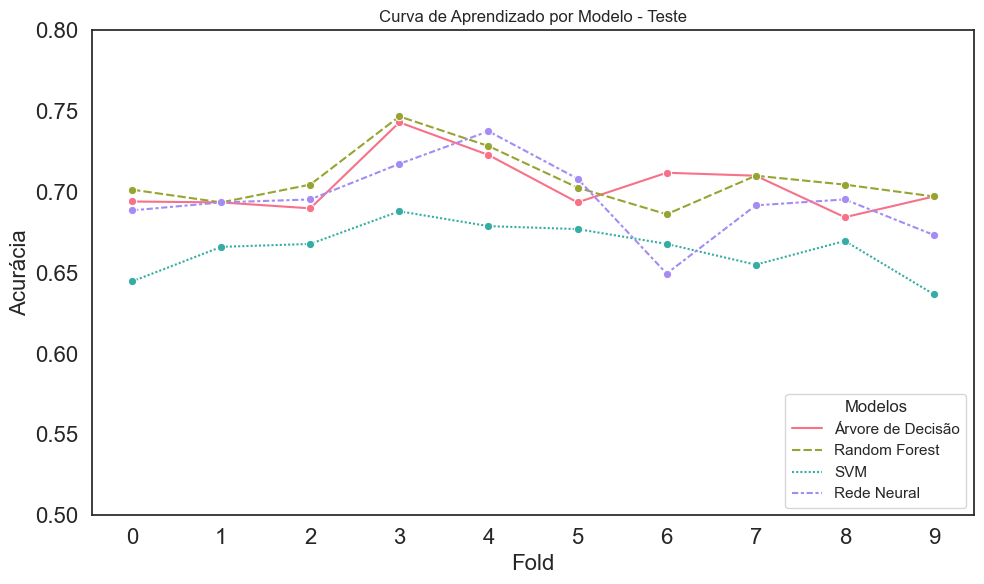

In [206]:
visualizacao.line_plot(resultados_comp_teste, title_plot='Curva de Aprendizado por Modelo - Teste', xlabel='Fold',
                       ylabel='Acurácia', legend_title='Modelos', save_path='../imagens/curva_aprend_ML1_teste.png')

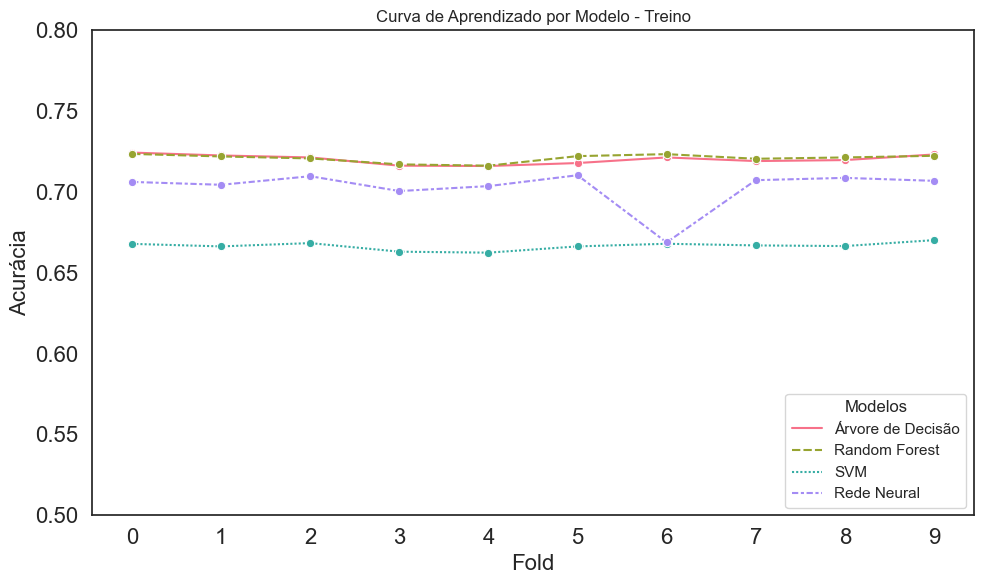

In [207]:
visualizacao.line_plot(resultados_comp_treino, title_plot='Curva de Aprendizado por Modelo - Treino', xlabel='Fold',
                       ylabel='Acurácia', legend_title='Modelos', save_path='../imagens/curva_aprend_ML1_treino.png')

Teste de normalidade

In [ ]:
alpha = 0.05

In [ ]:
from scipy.stats import shapiro

In [ ]:
shapiro(resultados_arvore_comp), shapiro(resultados_random_forest_comp), shapiro(resultados_svm_comp), shapiro(resultados_rede_neural_comp)

Teste de hipótese com ANOVA e Tukey

In [ ]:
from scipy.stats import f_oneway

In [ ]:
_, p = f_oneway(resultados_arvore_comp, resultados_random_forest_comp, resultados_svm_comp, resultados_rede_neural_comp)
p

In [ ]:
alpha = 0.05
if p <= alpha:
  print('Hipótese nula rejeitada. Dados são diferentes')
else:
  print('Hipótese alternativa rejeitada. Resultados são iguais')

In [ ]:
resultados_algoritmos_comp = {'accuracy': np.concatenate([resultados_arvore_comp, resultados_random_forest_comp, resultados_svm_comp, resultados_rede_neural_comp]),
                         'algoritmo': ['arvore']*len(resultados_arvore_comp) + ['random_forest']*len(resultados_random_forest_comp) + ['svm']*len(resultados_svm_comp) + ['rede_neural']*len(resultados_rede_neural_comp)}


In [ ]:
resultados_df_comp = pd.DataFrame(resultados_algoritmos_comp)
resultados_df_comp

In [ ]:
!pip install statsmodels

In [ ]:
from statsmodels.stats.multicomp import MultiComparison

In [ ]:
compara_algoritmos_comp = MultiComparison(resultados_df_comp['accuracy'], resultados_df_comp['algoritmo'])

In [ ]:
teste_estatistico_comp = compara_algoritmos_comp.tukeyhsd()
print(teste_estatistico_comp)

In [ ]:
resultados_comp.mean()

In [ ]:
teste_estatistico_comp.plot_simultaneous();

Salvar o classificador treinado

In [ ]:
# classificador_randomForest = RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=10,
#                        n_estimators=200, n_jobs=-1, random_state=42,
#                        warm_start=True)
# classificador_randomForest.fit(x_poscomp, y_poscomp)

In [ ]:
import pickle
pickle.dump(classificador_randomForest, open('randomForest_finalizado.sav', 'wb'))

Carregar um classificar treinado

In [ ]:
randomForest = pickle.load(open('randomForest_finalizado.sav', 'rb'))

##### Algoritmos para computação

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

algorithms = [
    ('Árvore de Decisão (C4.5)', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42, n_estimators=1000)),
    ('SVM', SVC(random_state=42)),
    ('Rede Neural', MLPClassifier(random_state=42)),
]

for name, classifier in algorithms:
    classifier.fit(x_train_comp, y_train_comp)
    train_predictions_comp = classifier.predict(x_train_comp)
    test_predictions_comp = classifier.predict(x_test_comp)
    
    train_accuracy_comp = accuracy_score(y_train_comp, train_predictions_comp)
    test_accuracy_comp = accuracy_score(y_test_comp, test_predictions_comp)
    
    precision_comp = precision_score(y_test_comp, test_predictions_comp, average='macro')
    recall_comp = recall_score(y_test_comp, test_predictions_comp, average='macro')
    f1_comp = f1_score(y_test_comp, test_predictions_comp, average='macro')
    
    conf_matrix_comp = confusion_matrix(y_test_comp, test_predictions_comp)
    
    print(f'{name} - Acurácia no Conjunto de Treinamento: {train_accuracy_comp * 100:.2f}%')
    print(f'{name} - Acurácia no Conjunto de Teste: {test_accuracy_comp * 100:.2f}%')
    print(f'{name} - Precisão: {precision_comp * 100:.2f}%')
    print(f'{name} - Recall: {recall_comp * 100:.2f}%')
    print(f'{name} - F1-Score: {f1_comp * 100:.2f}%')
    print(f'{name} - Matriz de Confusão:\n{conf_matrix_comp}\n')


### Candidates classified for the information area

In [27]:
df_information = dataset[dataset['area_concentration'] == 'informatica']

In [28]:
df_information = df_information.loc[:,['IDADE','SEXO','REGIAO','ESTADO','matematica', 'fund_computacao','tec_computacao','total','linhas_pesquisas']]

In [29]:
categorical_columns_inf = ["linhas_pesquisas",'SEXO','REGIAO','ESTADO']
df_information = encode_categorical_columns(df_information, categorical_columns_inf)

In [30]:
x_information = df_information.drop(['linhas_pesquisas'], axis=1)
y_information = df_information['linhas_pesquisas']

Dividir a Base

In [32]:
x_train_inf, x_test_inf, y_train_inf, y_test_inf = train_test_split(x_information, y_information, 
                                                                        test_size=0.3, stratify=y_information)

In [33]:
print("Shape of x_train : ",x_train_inf.shape)
print("Shape of x_test  : ",x_test_inf.shape)
print("Shape of y_train : ",y_train_inf.shape)
print("Shape of y_test  : ",y_test_inf.shape)

Shape of x_train :  (2213, 8)
Shape of x_test  :  (949, 8)
Shape of y_train :  (2213,)
Shape of y_test  :  (949,)


###### Arvore de Decisão

In [ ]:
parametros = {'criterion': ["entropy", "log_loss"],
    'splitter': ["best"],
    'max_depth': [4,5],  # Ou qualquer outro intervalo apropriado
    # 'min_samples_split': [2, 5, 10],
    'min_samples_leaf': np.arange(21,41,2),
    # 'min_weight_fraction_leaf': [0.0, 0.1, 0.2],
    'max_features': [5],
    # 'max_leaf_nodes': [None, 5, 10, 20],
    # 'min_impurity_decrease': [0.0, 0.1, 0.2],
    # 'ccp_alpha': [0.0, 0.1, 0.2],
}

In [ ]:
tree_clf = ClassifierWrapper(DecisionTreeClassifier(random_state=42), parametros)
tree_clf.grid_search(x_train_inf, y_train_inf)
tree_clf.train_and_print_scores(x_train_inf, y_train_inf, x_test_inf, y_test_inf)

###### Random Forest

In [ ]:
parametros = {
    'n_estimators': [600,700,800], 
    'criterion': ["entropy"],
    'max_depth': [10,11],
    'min_samples_split': [2,4,6,8],
    'min_samples_leaf': [9,10,11],
    # 'min_weight_fraction_leaf': [0.0, 0.1, 0.2],
    'max_features':[5,6,7,8],
    # 'max_leaf_nodes': [None, 10, 20, 30],
    # 'min_impurity_decrease': [0.0, 0.1, 0.2],
    # 'bootstrap': [False],
    # 'oob_score': [True, False],
    'n_jobs': [-1],  # Use -1 para usar todos os processadores disponíveis
    # 'verbose': [0, 1, 2],
    # 'warm_start': [True],
    # 'class_weight': [None, 'balanced', 'balanced_subsample'],
    # 'ccp_alpha': [0.0, 0.1, 0.2],
    # 'max_samples': [None, 0.7, 0.8, 0.9],
}

In [ ]:
forest_clf = ClassifierWrapper(RandomForestClassifier(random_state=42), parametros)
forest_clf.grid_search(x_train_inf, y_train_inf, cv=10)
forest_clf.train_and_print_scores(x_train_inf, y_train_inf, x_test_inf, y_test_inf)

###### SVM

In [ ]:
parametros = {
    'C': [1,0.1,0.01,0.0001],
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
    'degree': [1,2,3],
    # 'gamma': ['scale', 'auto', 0.1, 1.0],
    # 'coef0': [0.0, 0.1, 1.0],
    # 'shrinking': [True, False],
    # 'probability': [True],
    # 'tol': [1e-4],
    # 'cache_size': np.arange(1,11,2),
    # 'class_weight': [None, 'balanced'],
    # 'verbose': [True],
    # 'max_iter': [100, 1000, -1],  # -1 indica nenhum limite
    # 'decision_function_shape': ['ovr', 'ovo'],
    # 'break_ties': [True],
} 

In [ ]:
svm_clf = ClassifierWrapper(SVC(random_state=42), parametros)
svm_clf.grid_search(x_train_inf, y_train_inf, cv=3)
svm_clf.train_and_print_scores(x_train_inf, y_train_inf, x_test_inf, y_test_inf)

###### Rede Neural

In [ ]:
parametros = {
    'hidden_layer_sizes': [(200,100,50)],  # Experimente diferentes configurações de camadas e neurônios
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['adam'],
    'alpha': [0.00001],
    'batch_size': [50],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'learning_rate_init': [0.001, 0.01, 0.1],
    # 'power_t': [0.4],
    'max_iter': [70],
    # 'shuffle': [True],
    # 'tol': [1e-3],
    # 'verbose': [True, False],
    # 'warm_start': [True, False],
    # 'momentum': [0.001,0.002],
    # 'nesterovs_momentum': [True, False],
    # 'early_stopping': [True, False],
    # 'validation_fraction': [0.1, 0.2],
    # 'beta_1': [0.9, 0.99],
    # 'beta_2': [0.99990,0.9999999],
    # 'epsilon': [1e-5],
    # 'n_iter_no_change': [15],
    # 'max_fun': [10000, 15000, 20000]
}

In [ ]:
neural_clf = ClassifierWrapper(MLPClassifier(random_state=42), parametros)
neural_clf.grid_search(x_train_inf, y_train_inf, cv=3)
neural_clf.train_and_print_scores(x_train_inf, y_train_inf, x_test_inf, y_test_inf)

##### Validação Cruzada

In [34]:
x_poscomp_inf = np.concatenate((x_train_inf, x_test_inf), axis = 0)
y_poscomp_inf = np.concatenate((y_train_inf, y_test_inf), axis = 0)

In [35]:
# Uso para Decision Tree
params_arvore_inf = {'criterion':'entropy', 'max_depth':10, 'max_features':4,
                       'min_samples_leaf':2, 'random_state':42, 'splitter':'random'}
resultados_arvore_inf = ClassifierWrapper.avaliar_classificador(DecisionTreeClassifier, params_arvore_inf, x_poscomp_inf, y_poscomp_inf)

# Uso para Random Forest
params_random_forest_inf = {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 4, 
                            'min_samples_leaf': 17, 'min_samples_split': 2, 'n_estimators': 200, 'n_jobs': -1}
resultados_random_forest_inf = ClassifierWrapper.avaliar_classificador(RandomForestClassifier, params_random_forest_inf, x_poscomp_inf, y_poscomp_inf)

# Uso para SVM
params_svm_inf = {'kernel': 'rbf','C': 1, 'gamma': 0.01, 'probability': True, 'tol': 0.0001}
resultados_svm_inf = ClassifierWrapper.avaliar_classificador(SVC, params_svm_inf, x_poscomp_inf, y_poscomp_inf)

# Uso para MLP (Rede Neural)
params_rede_neural_inf = {'activation': 'tanh', 'alpha': 1e-05, 'batch_size': 50, 'hidden_layer_sizes': (200, 100, 50), 
                           'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_iter': 70, 'solver': 'adam'}
resultados_rede_neural_inf = ClassifierWrapper.avaliar_classificador(MLPClassifier, params_rede_neural_inf, x_poscomp_inf, y_poscomp_inf)

In [36]:
resultados_inf = pd.DataFrame({'decisionTree_treino': resultados_arvore_inf[0]['train_score'], 
                                'decisionTree_teste': resultados_arvore_inf[0]['test_score'],
                                'randomForest_treino': resultados_random_forest_inf[0]['train_score'],
                                'randomForest_teste': resultados_random_forest_inf[0]['test_score'],
                                'svm_treino': resultados_svm_inf[0]['train_score'],
                                'svm_teste': resultados_svm_inf[0]['test_score'],
                                'redeNeural_treino': resultados_rede_neural_inf[0]['train_score'],
                                'redeNeural_teste': resultados_rede_neural_inf[0]['test_score'],
                               })

In [112]:
medias = resultados_inf.mean()
for nome_coluna, media in medias.items():
    print(f'Média da {nome_coluna}: {media * 100:.2f}%')

Média da decisionTree_treino: 72.94%
Média da decisionTree_teste: 66.45%
Média da randomForest_treino: 70.86%
Média da randomForest_teste: 68.94%
Média da svm_treino: 67.83%
Média da svm_teste: 65.72%
Média da redeNeural_treino: 71.34%
Média da redeNeural_teste: 67.33%


In [119]:
resultados_inf_teste = resultados_inf.loc[:,['decisionTree_teste','randomForest_teste','svm_teste','redeNeural_teste']]

In [120]:
resultados_inf_teste.mean()

decisionTree_teste    0.664462
randomForest_teste    0.689437
svm_teste             0.657180
redeNeural_teste      0.673305
dtype: float64

In [123]:
resultados_inf_teste.columns = ['Árvore de Decisão', 'Random Forest', 'SVM', 'Rede Neural']

In [124]:
resultados_inf_teste

,Árvore de Decisão,Random Forest,SVM,Rede Neural
0,0.634069,0.684543,0.646688,0.668770
1,0.665615,0.694006,0.665615,0.687697
2,0.699367,0.705696,0.677215,0.680380
3,0.686709,0.689873,0.655063,0.674051
4,0.645570,0.670886,0.651899,0.686709
5,0.648734,0.667722,0.680380,0.617089
6,0.683544,0.737342,0.642405,0.721519
7,0.658228,0.689873,0.658228,0.677215
8,0.664557,0.667722,0.629747,0.664557
9,0.658228,0.686709,0.664557,0.655063


In [45]:
resultados_inf_treino = resultados_inf.loc[:,['decisionTree_treino','randomForest_treino','svm_treino','redeNeural_treino']]

In [126]:
resultados_inf_treino.columns = ['Árvore de Decisão', 'Random Forest', 'SVM', 'Rede Neural']

In [53]:
resultados_inf_treino.mean()

decisionTree_treino    0.729426
randomForest_treino    0.708588
svm_treino             0.678333
redeNeural_treino      0.713368
dtype: float64

In [ ]:
(resultados_inf.std() / resultados_inf.mean()) * 100

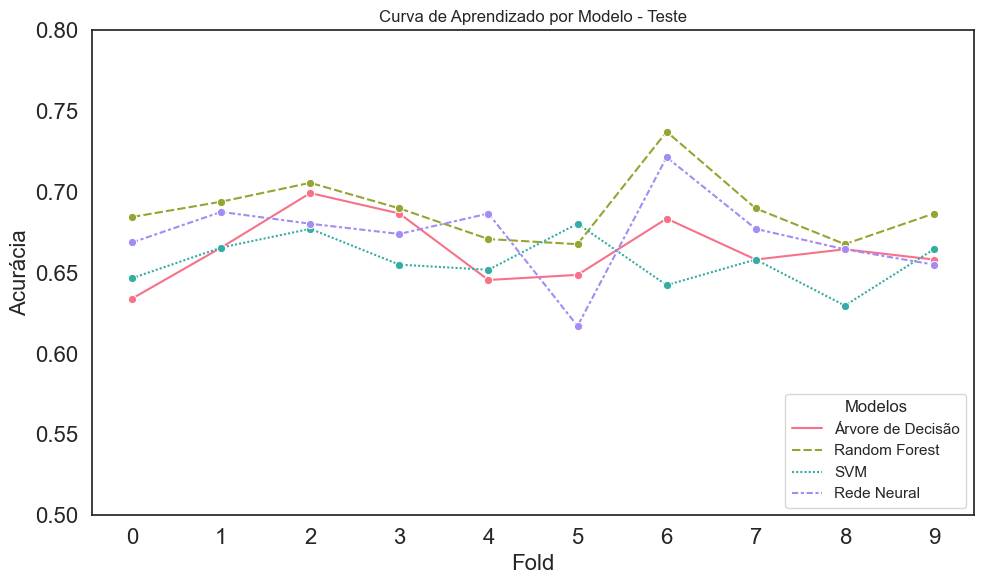

In [209]:
visualizacao.line_plot(resultados_inf_teste, title_plot='Curva de Aprendizado por Modelo - Teste', 
                       xlabel='Fold', ylabel='Acurácia', save_path='../imagens/curva_aprend_ML2_teste.png',
                      legend_title='Modelos')

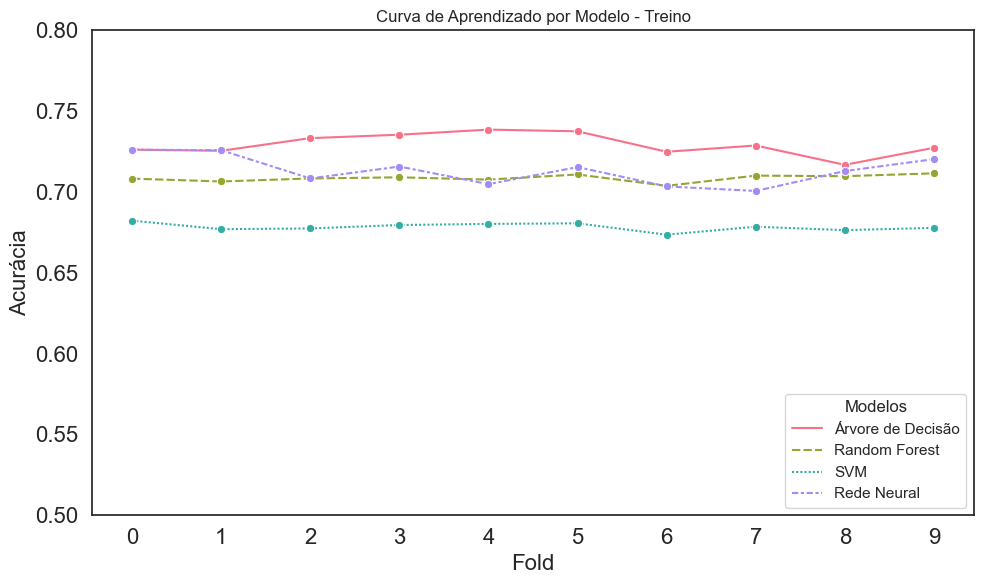

In [210]:
visualizacao.line_plot(resultados_inf_treino, title_plot='Curva de Aprendizado por Modelo - Treino', 
                       xlabel='Fold', ylabel='Acurácia', save_path='../imagens/curva_aprend_ML2_treino.png',
                      legend_title='Modelos')

Teste de normalidade

In [ ]:
alpha = 0.05

In [ ]:
from scipy.stats import shapiro

In [ ]:
shapiro(resultados_arvore_inf), shapiro(resultados_random_forest_inf), shapiro(resultados_svm_inf), shapiro(resultados_rede_neural_inf)

Teste de hipótese com ANOVA e Tukey

In [ ]:
from scipy.stats import f_oneway

In [ ]:
_, p_inf = f_oneway(resultados_arvore_inf, resultados_random_forest_inf, resultados_svm_inf, resultados_rede_neural_inf)
p_inf

In [ ]:
alpha = 0.05
if p_inf <= alpha:
  print('Hipótese nula rejeitada. Dados são diferentes')
else:
  print('Hipótese alternativa rejeitada. Resultados são iguais')

In [ ]:
resultados_algoritmos_inf = {'accuracy': np.concatenate([resultados_arvore_inf, resultados_random_forest_inf, resultados_svm_inf, resultados_rede_neural_inf]),
                         'algoritmo': ['arvore']*len(resultados_arvore_inf) + ['random_forest']*len(resultados_random_forest_inf) + ['svm']*len(resultados_svm_inf) + ['rede_neural']*len(resultados_rede_neural_inf)}


In [ ]:
resultados_df_inf = pd.DataFrame(resultados_algoritmos_inf)
resultados_df_inf

In [ ]:
from statsmodels.stats.multicomp import MultiComparison

In [ ]:
compara_algoritmos_inf = MultiComparison(resultados_df_inf['accuracy'], resultados_df_inf['algoritmo'])

In [ ]:
teste_estatistico_inf = compara_algoritmos_inf.tukeyhsd()
print(teste_estatistico_inf)

In [ ]:
resultados_inf.mean()

In [ ]:
teste_estatistico_inf.plot_simultaneous();

##### Algoritmos para informação

In [ ]:
algorithms = [
    ('Árvore de Decisão (C4.5)', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('SVM', SVC(random_state=42)),
    ('Rede Neural', MLPClassifier(random_state=42)),
]

for name, classifier in algorithms:
    classifier.fit(x_train_inf, y_train_inf)
    train_predictions_inf = classifier.predict(x_train_inf)
    test_predictions_inf = classifier.predict(x_test_inf)
    
    train_accuracy_inf = accuracy_score(y_train_inf, train_predictions_inf)
    test_accuracy_inf = accuracy_score(y_test_inf, test_predictions_inf)
    
    precision_inf = precision_score(y_test_inf, test_predictions_inf, average='macro')
    recall_inf = recall_score(y_test_inf, test_predictions_inf, average='macro')
    f1_inf = f1_score(y_test_inf, test_predictions_inf, average='macro')
    
    conf_matrix_inf = confusion_matrix(y_test_inf, test_predictions_inf)
    
    print(f'{name} - Acurácia no Conjunto de Treinamento: {train_accuracy_inf * 100:.2f}%')
    print(f'{name} - Acurácia no Conjunto de Teste: {test_accuracy_inf * 100:.2f}%')
    print(f'{name} - Precisão: {precision_inf * 100:.2f}%')
    print(f'{name} - Recall: {recall_inf * 100:.2f}%')
    print(f'{name} - F1-Score: {f1_inf * 100:.2f}%')
    print(f'{name} - Matriz de Confusão:\n{conf_matrix_inf}\n')


### Os algoritmos

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

algorithms = [
    ('Árvore de Decisão (C4.5)', DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=6,
                       random_state=42)),
    ('Random Forest', RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=10,
                       n_estimators=200, n_jobs=-1, random_state=42,
                       warm_start=True)),
    ('SVM', SVC(C=5000, break_ties=True, degree=1, probability=True, random_state=42,
    tol=0.0001, verbose=True)),
    ('Rede Neural', MLPClassifier(activation='tanh', hidden_layer_sizes=(100, 100), random_state=42)),
]

for name, classifier in algorithms:
    classifier.fit(x_train, y_train)
    train_predictions = classifier.predict(x_train)
    test_predictions = classifier.predict(x_test)
    
    train_accuracy = accuracy_score(y_train, train_predictions)
    test_accuracy = accuracy_score(y_test, test_predictions)
    
    precision = precision_score(y_test, test_predictions, average='macro')
    recall = recall_score(y_test, test_predictions, average='macro')
    f1 = f1_score(y_test, test_predictions, average='macro')
    
    conf_matrix = confusion_matrix(y_test, test_predictions)
    
    print(f'{name} - Acurácia no Conjunto de Treinamento: {train_accuracy * 100:.2f}%')
    print(f'{name} - Acurácia no Conjunto de Teste: {test_accuracy * 100:.2f}%')
    print(f'{name} - Precisão: {precision * 100:.2f}%')
    print(f'{name} - Recall: {recall * 100:.2f}%')
    print(f'{name} - F1-Score: {f1 * 100:.2f}%')
    print(f'{name} - Matriz de Confusão:\n{conf_matrix}\n')